#  Selección de Características mediante Clustering

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import itertools
import seaborn as sns
from numpy import corrcoef, transpose, arange
from pylab import pcolor, show, colorbar, xticks, yticks

## Carga de Datos

In [ ]:
from google.colab import files

uploaded = files.upload()

for fn in uploaded.keys():
  print('User uploaded file "{name}" with length {length} bytes'.format(
      name=fn, length=len(uploaded[fn])))

Saving despob_pob_actividad_ocupados_ipc_pib_2023.csv to despob_pob_actividad_ocupados_ipc_pib_2023.csv
User uploaded file "despob_pob_actividad_ocupados_ipc_pib_2023.csv" with length 14593 bytes


In [ ]:
import pandas as pd
import io
df = pd.read_csv(io.StringIO(uploaded[fn].decode('utf-8')), sep=";", index_col='nom_prov')
df.drop(['cod_prov'], axis=1, inplace=True)
df_feat = transpose(df)
df_feat

nom_prov               Araba/Álava    Albacete  Alicante/Alacant      Almería  \
porcen_desp                  80.00       73.00             44.00        62.00   
pob_tot                  336686.00   387174.00        1950357.00    753920.00   
pob_hom                  165743.00   193676.00         963046.00    385180.00   
pob_muj                  170943.00   193498.00         987311.00    368740.00   
asexos_tactividad            58.33       59.00             58.41        61.16   
asexos_templeo               54.36       51.98             50.70        51.44   
asexos_tparo                  6.80       11.88             13.22        15.87   
hombres_tactividad           64.94       66.18             63.68        67.63   
hombres_templeo              60.84       59.80             56.54        57.62   
hombres_tparo                 6.30        9.63             11.23        14.76   
mujeres_tactividad           52.15       51.91             53.36        54.53   
mujeres_templeo              48.30       44.26             45.09        45.10   
mujeres_tparo                 7.36       14.72             15.50        17.35   
ocupados_agricultura          1.70        8.93              2.12        21.50   
ocupados_construccion         4.88        5.70              8.88         4.65   
ocupados_industria           28.05       14.32             13.55         8.28   
ocupados_servicios           65.35       71.05             75.47        65.57   
ipc_alim                    122.42      124.91            125.63       125.04   
ipc_bebi                    110.94      112.22            112.59       111.76   
ipc_vest                    100.99      106.55            106.79       102.37   
ipc_vivi                    100.95      105.06             99.05       101.34   
ipc_hoga                    112.35      110.65            111.75       109.40   
ipc_sani                    102.99      100.65            102.82       102.99   
ipc_trans                   112.54      112.93            114.18       111.78   
ipc_comu                    101.79      102.15            101.77       102.34   
ipc_ocio                    107.50      107.02            107.64       106.23   
ipc_ense                    102.22      105.42            103.41       103.67   
ipc_resta                   112.59      116.28            113.39       113.73   
ipc_otros                   109.40      109.24            109.62       108.12   
pib_prec               12939983.00  8663814.00       37279735.00  15659622.00   
pib_agri                 201362.00   884324.00         547312.00   2443690.00   
pib_indu                3832143.00  1397006.00        3627964.00   1348695.00   
pib_ind_manu            3473573.00  1018831.00        2916222.00   1020119.00   
pib_constr               400677.00   465911.00        2556047.00    723957.00   
pib_comer               1946392.00  1559382.00        9851680.00   3793774.00   
pib_act_fin             2434844.00  1440261.00        8929332.00   2816431.00   
pib_admin               2891885.00  2091603.00        8216082.00   3041318.00   
pib_valor_brut         11707303.00  7838487.00       33728417.00  14167865.00   
pib_imp_netos           1232680.00   825327.00        3551318.00   1491757.00   

nom_prov                    Ávila      Badajoz  Balears, Illes     Barcelona  \
porcen_desp                 94.00        62.00           17.00  3.700000e+01   
pob_tot                 158407.00   1330178.00      1197261.00  5.805500e+06   
pob_hom                  79551.00    656840.00       595216.00  2.833196e+06   
pob_muj                  78856.00    673338.00       602045.00  2.972304e+06   
asexos_tactividad           53.84        57.99           63.77  6.217000e+01   
asexos_templeo              47.52        47.25           57.10  5.666000e+01   
asexos_tparo                11.72        18.52           10.60  8.860000e+00   
hombres_tactividad          60.37        64.30           67.94  6.625000e+01   
hombres_templeo             53.97      

Una vez que contamos con el DataFrame de Pandas podríamos analizar qué características necesitamos y cuales deberíamos excluir.

In [ ]:
names =  df_feat.index
names

Index(['porcen_desp', 'pob_tot', 'pob_hom', 'pob_muj', 'asexos_tactividad',
       'asexos_templeo', 'asexos_tparo', 'hombres_tactividad',
       'hombres_templeo', 'hombres_tparo', 'mujeres_tactividad',
       'mujeres_templeo', 'mujeres_tparo', 'ocupados_agricultura',
       'ocupados_construccion', 'ocupados_industria', 'ocupados_servicios',
       'ipc_alim', 'ipc_bebi', 'ipc_vest', 'ipc_vivi', 'ipc_hoga', 'ipc_sani',
       'ipc_trans', 'ipc_comu', 'ipc_ocio', 'ipc_ense', 'ipc_resta',
       'ipc_otros', 'pib_prec', 'pib_agri', 'pib_indu', 'pib_ind_manu',
       'pib_constr', 'pib_comer', 'pib_act_fin', 'pib_admin', 'pib_valor_brut',
       'pib_imp_netos'],
      dtype='object')

# Correlación entre variables

Con el fin de que obtener un mejor rendimiento en el algoritmo de clustering será necesario identificar aquellas variables que son redundantes, es decir, se puede asumir que representan lo mismo, en este caso se puede utilizar el análisis de correlaciones.

<Axes: >

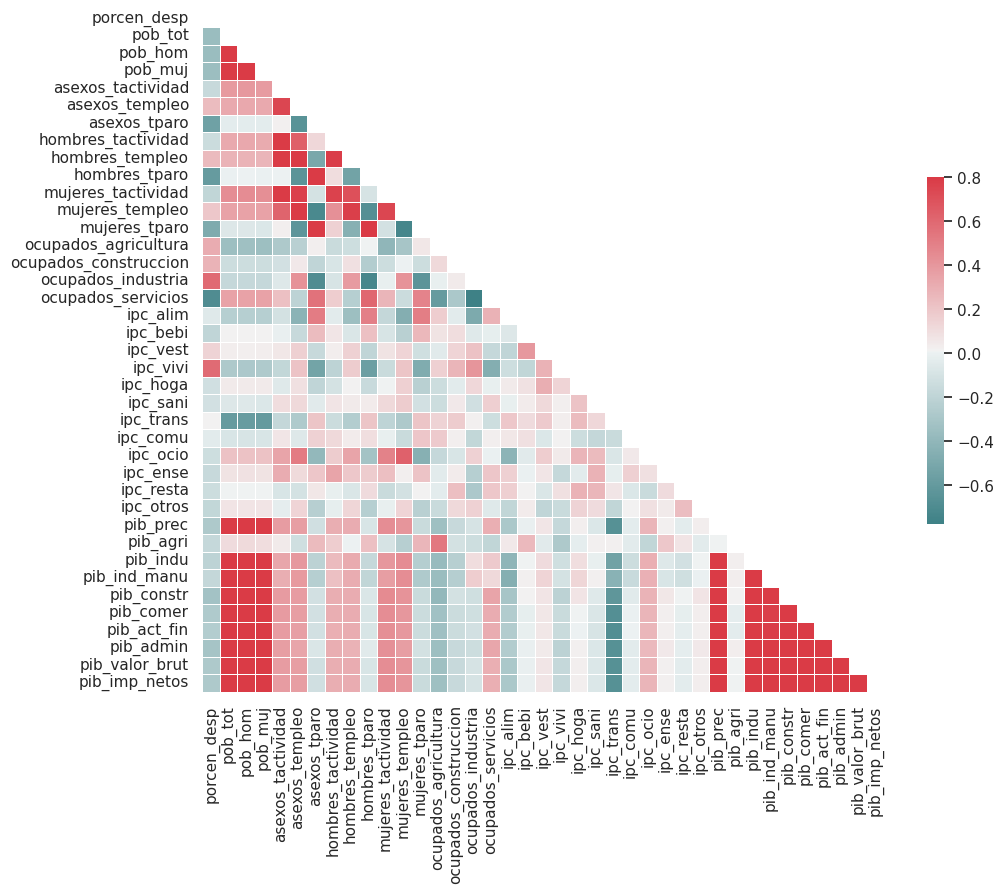

In [ ]:
R = corrcoef(df_feat)
sns.set(style="white")
mask = np.zeros_like(R, dtype=np.bool_)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

cmap = sns.diverging_palette(200, 10, as_cmap=True)

sns.heatmap(R, mask=mask, cmap=cmap, vmax=.8,
            square=True, xticklabels=names, yticklabels=names,
            linewidths=.5, cbar_kws={"shrink": .5}, ax=ax)

# Análisis de componentes principales


Variance Ratio:  [0.99032402 0.00612367]


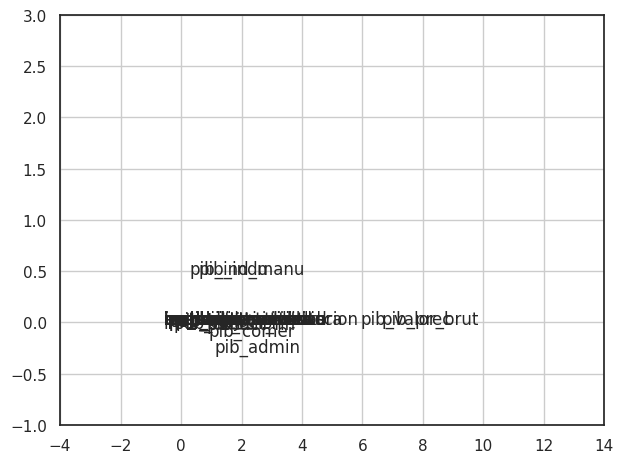

In [ ]:
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler()
features_norm = min_max_scaler.fit_transform(df_feat)

#1.2. Principal Component Analysis
from sklearn.decomposition import PCA
estimator = PCA (n_components = 2)
X_pca = estimator.fit_transform(features_norm)
print("Variance Ratio: ", estimator.explained_variance_ratio_)

import matplotlib.pyplot as plt
fig, ax = plt.subplots()
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i])

plt.xlim(-4, 14)
plt.ylim(-1,3)
ax.grid(True)
fig.tight_layout()
plt.show()

# Clustering jerárquico


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_distance_metric.py:10: FutureWarning: sklearn.neighbors.DistanceMetric has been moved to sklearn.metrics.DistanceMetric in 1.0. This import path will be removed in 1.3
  warnings.warn(


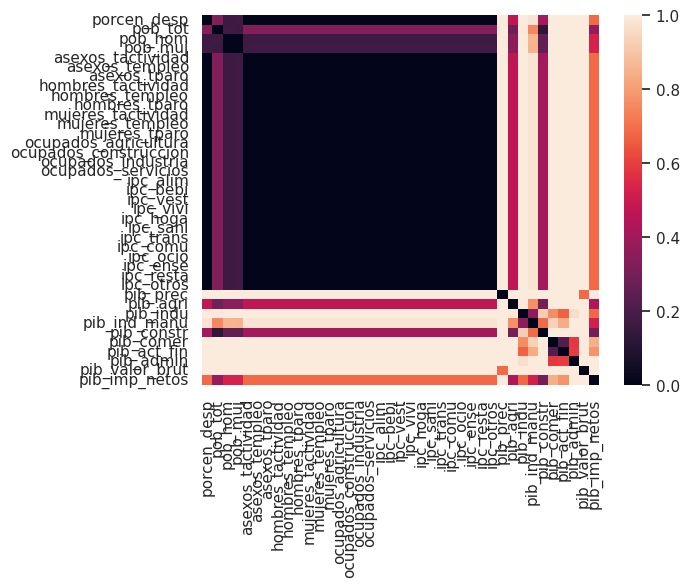

In [ ]:
from scipy import cluster
import sklearn.neighbors
dist = sklearn.neighbors.DistanceMetric.get_metric('euclidean')
matdist= dist.pairwise(features_norm)

import seaborn as sns; sns.set()
ax = sns.heatmap(matdist,vmin=0, vmax=1, yticklabels = names, xticklabels = names)

<ipython-input-10-7b23a5d00e26>:1: ClusterWarning: scipy.cluster: The symmetric non-negative hollow observation matrix looks suspiciously like an uncondensed distance matrix
  clusters = cluster.hierarchy.linkage(matdist, method = 'single')


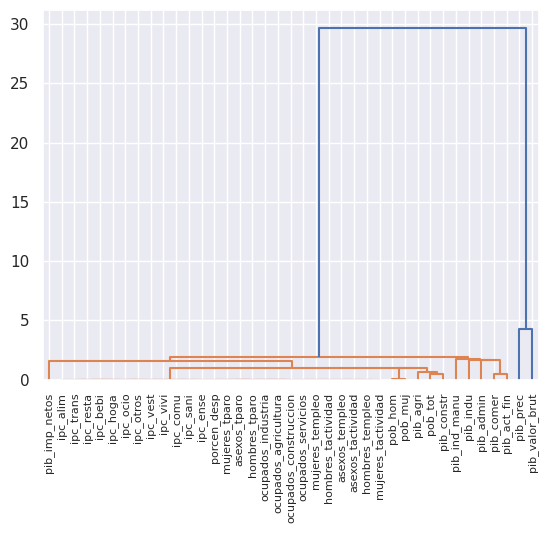

In [ ]:
clusters = cluster.hierarchy.linkage(matdist, method = 'single')
cluster.hierarchy.dendrogram(clusters, color_threshold = 3, labels = names , leaf_rotation=90)
plt.show()

Vamos a obtener la asignación de grupos de cada uno de ellos

In [ ]:
cut = 3
labels = cluster.hierarchy.fcluster(clusters, cut , criterion = 'distance')
labels

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 3, 1], dtype=int32)

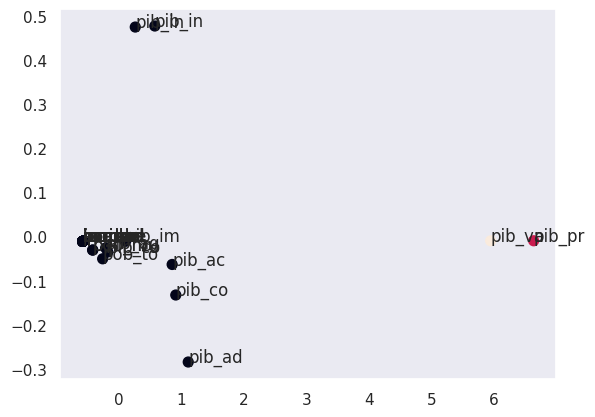

In [ ]:
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:6])

plt.grid()
plt.show()

In [ ]:
df_feat['group'] = labels

In [ ]:
df_feat[df_feat['group'] == 1]

nom_prov               Araba/Álava    Albacete  Alicante/Alacant     Almería  \
porcen_desp                  80.00       73.00             44.00       62.00   
pob_tot                  336686.00   387174.00        1950357.00   753920.00   
pob_hom                  165743.00   193676.00         963046.00   385180.00   
pob_muj                  170943.00   193498.00         987311.00   368740.00   
asexos_tactividad            58.33       59.00             58.41       61.16   
asexos_templeo               54.36       51.98             50.70       51.44   
asexos_tparo                  6.80       11.88             13.22       15.87   
hombres_tactividad           64.94       66.18             63.68       67.63   
hombres_templeo              60.84       59.80             56.54       57.62   
hombres_tparo                 6.30        9.63             11.23       14.76   
mujeres_tactividad           52.15       51.91             53.36       54.53   
mujeres_templeo              48.30       44.26             45.09       45.10   
mujeres_tparo                 7.36       14.72             15.50       17.35   
ocupados_agricultura          1.70        8.93              2.12       21.50   
ocupados_construccion         4.88        5.70              8.88        4.65   
ocupados_industria           28.05       14.32             13.55        8.28   
ocupados_servicios           65.35       71.05             75.47       65.57   
ipc_alim                    122.42      124.91            125.63      125.04   
ipc_bebi                    110.94      112.22            112.59      111.76   
ipc_vest                    100.99      106.55            106.79      102.37   
ipc_vivi                    100.95      105.06             99.05      101.34   
ipc_hoga                    112.35      110.65            111.75      109.40   
ipc_sani                    102.99      100.65            102.82      102.99   
ipc_trans                   112.54      112.93            114.18      111.78   
ipc_comu                    101.79      102.15            101.77      102.34   
ipc_ocio                    107.50      107.02            107.64      106.23   
ipc_ense                    102.22      105.42            103.41      103.67   
ipc_resta                   112.59      116.28            113.39      113.73   
ipc_otros                   109.40      109.24            109.62      108.12   
pib_agri                 201362.00   884324.00         547312.00  2443690.00   
pib_indu                3832143.00  1397006.00        3627964.00  1348695.00   
pib_ind_manu            3473573.00  1018831.00        2916222.00  1020119.00   
pib_constr               400677.00   465911.00        2556047.00   723957.00   
pib_comer               1946392.00  1559382.00        9851680.00  3793774.00   
pib_act_fin             2434844.00  1440261.00        8929332.00  2816431.00   
pib_admin               2891885.00  2091603.00        8216082.00  3041318.00   
pib_imp_netos           1232680.00   825327.00        3551318.00  1491757.00   

nom_prov                   Ávila     Badajoz  Balears, Illes    Barcelona  \
porcen_desp                94.00       62.00           17.00        37.00   
pob_tot                158407.00  1330178.00      1197261.00   5805500.00   
pob_hom                 79551.00   656840.00       595216.00   2833196.00   
pob_muj                 78856.00   673338.00       602045.00   2972304.00   
asexos_tactividad          53.84       57.99           63.77        62.17   
asexos_templeo             47.52       47.25           57.10        56.66   
asexos_tparo               11.72       18.52           10.60         8.86   
hombres_tactividad         60.37       64.30           67.94        66.25   
hombres_templeo            53.97       54.62           61.09        60.46   
hombres_tparo              10.58       15.03           10.18         8.74   
mujeres_tactividad         47.21       51.92           59.67        58.40   
mujeres_templeo            40.98   

In [ ]:
df_feat[df_feat['group'] == 2]

nom_prov  Araba/Álava   Albacete  Alicante/Alacant     Almería      Ávila  \
pib_prec   12939983.0  8663814.0        37279735.0  15659622.0  3300110.0   

nom_prov     Badajoz  Balears, Illes    Barcelona      Burgos    Cáceres  ...  \
pib_prec  12723211.0      30031668.0  173721885.0  10276704.0  7926526.0  ...   

nom_prov     Teruel      Toledo  Valencia/València  Valladolid     Bizkaia  \
pib_prec  3460089.0  13258842.0         61410589.0  14293892.0  35446900.0   

nom_prov     Zamora    Zaragoza      Ceuta    Melilla  group  
pib_prec  3582273.0  27896994.0  1765159.0  1616543.0      2  

[1 rows x 53 columns]

In [ ]:
df_feat[df_feat['group'] == 3]

nom_prov        Araba/Álava   Albacete  Alicante/Alacant     Almería  \
pib_valor_brut   11707303.0  7838487.0        33728417.0  14167865.0   

nom_prov            Ávila     Badajoz  Balears, Illes    Barcelona     Burgos  \
pib_valor_brut  2985737.0  11511181.0      27170811.0  157172903.0  9297731.0   

nom_prov          Cáceres  ...     Teruel      Toledo  Valencia/València  \
pib_valor_brut  7171434.0  ...  3130476.0  11995787.0         55560533.0   

nom_prov        Valladolid     Bizkaia     Zamora    Zaragoza      Ceuta  \
pib_valor_brut  12932236.0  32070180.0  3241021.0  25239489.0  1597008.0   

nom_prov          Melilla  group  
pib_valor_brut  1462549.0      3  

[1 rows x 53 columns]

# DBSCAN



### Parametrización


Vamos a fijar MinPts = 3 y observar que epsilon podemos establecer


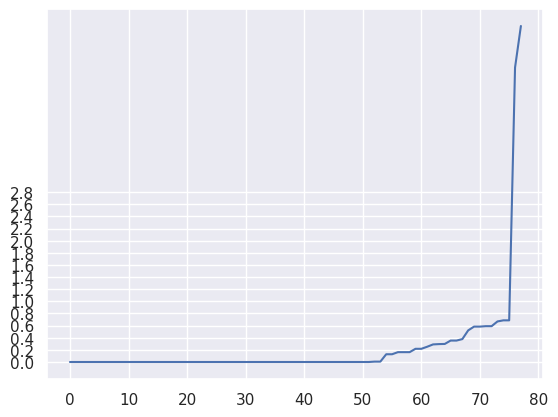

In [ ]:
minPts=2
from sklearn.neighbors import kneighbors_graph
A = kneighbors_graph(features_norm, minPts, include_self=False)
Ar = A.toarray()
seq = []
for i,s in enumerate(features_norm):
    for j in range(len(features_norm)):
        if Ar[i][j] != 0:
            seq.append(matdist[i][j])

seq.sort()
# establecer intervalo ejes
fig = plt.figure()
ax = fig.gca()
ax.set_xticks(np.arange(0, 120, 10))
ax.set_yticks(np.arange(0, 3, 0.2))

plt.plot(seq)

plt.show()

Vamos a establecer un rango amplio de pruebas teniendo en cuenta que buscamos aislar elementos diferentes a los demás.

## Ejecución

In [ ]:
from sklearn.cluster import DBSCAN

for eps in np.arange(0.50, 1.8, 0.20):
  db = DBSCAN(eps, min_samples=minPts).fit(features_norm)
  core_samples_mask = np.zeros_like(db.labels_, dtype=bool)
  core_samples_mask[db.core_sample_indices_] = True
  labels = db.labels_
  n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
  n_outliers = list(labels).count(-1)
  print ("%6.2f, %d, %d" % (eps, n_clusters_, n_outliers))

#labels

  0.50, 3, 3
  0.70, 2, 0
  0.90, 2, 0
  1.10, 2, 0
  1.30, 2, 0
  1.50, 2, 0
  1.70, 2, 0


Como podemos observar DBSCAN nos agrupa los elementos en un grupo y el resto son outliers. El número de outliers si es significativo tenerlo en cuenta, por lo que nos vamos a quedar con las parametrizaciones que nos ofrecen un mayor número de outliers.

In [ ]:
db = DBSCAN(eps=0.9, min_samples=minPts).fit(features_norm)
labels = db.labels_
labels

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0])

Visualizamos los resultados

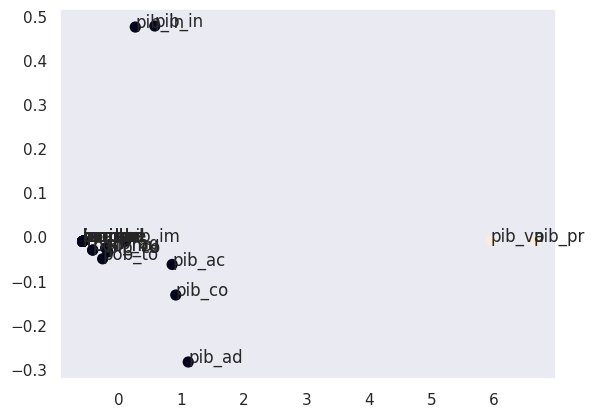

In [ ]:
#plotting orginal points with color related to label
plt.scatter(X_pca[:,0], X_pca[:,1], c=labels,s=50)
for i in range(len(X_pca)):
    plt.text(X_pca[i][0], X_pca[i][1], names[i][0:6])
plt.grid()
plt.show()

Y aunque podríamos proceder a su intepretación en este caso lo que vamos a hacer es identificar aquellos elementos que son outliers

In [ ]:
df_feat['dbscan_group'] = labels

In [ ]:
df_feat[df_feat['dbscan_group'] == 1]

nom_prov        Araba/Álava   Albacete  Alicante/Alacant     Almería  \
pib_prec         12939983.0  8663814.0        37279735.0  15659622.0   
pib_valor_brut   11707303.0  7838487.0        33728417.0  14167865.0   

nom_prov            Ávila     Badajoz  Balears, Illes    Barcelona  \
pib_prec        3300110.0  12723211.0      30031668.0  173721885.0   
pib_valor_brut  2985737.0  11511181.0      27170811.0  157172903.0   

nom_prov            Burgos    Cáceres  ...     Teruel      Toledo  \
pib_prec        10276704.0  7926526.0  ...  3460089.0  13258842.0   
pib_valor_brut   9297731.0  7171434.0  ...  3130476.0  11995787.0   

nom_prov        Valencia/València  Valladolid     Bizkaia     Zamora  \
pib_prec               61410589.0  14293892.0  35446900.0  3582273.0   
pib_valor_brut         55560533.0  12932236.0  32070180.0  3241021.0   

nom_prov          Zaragoza      Ceuta    Melilla  dbscan_group  
pib_prec        27896994.0  1765159.0  1616543.0             1  
pib_valor_brut  25239489.0  1597008.0  1462549.0             1  

[2 rows x 53 columns]